# Word2Vec 소개

### gensim 설치
* pip install gensim

## 유사한 단어들을 비슷한 방향과 힘의 벡터를 갖도록 변환하여 사용하는 방법
- 1안) 자신의 문장으로 단어별 벡터를 생성한다.
- 2안) 미리 트레이닝된 모델의 벡터를 이용한다.
- 3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.<br>
  (보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

### 1안) 자신의 문장으로 단어별 벡터를 생성한다.

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [3]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [22]:
# 문장을 이용하여 단어와 벡터를 생성
# model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)
# 단어수가 많지 않아 차원을 축소 --> 구글 데이터와 맞지 않아 오류 발생
model = Word2Vec(sentences, size=3, window=3, min_count=1, workers=1)

In [23]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [24]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [25]:
word_vectors_list

[array([ 0.10301434,  0.07435811, -0.15878005], dtype=float32),
 array([-0.07116137, -0.03515704,  0.0639416 ], dtype=float32),
 array([ 0.12073687, -0.04364339,  0.03946193], dtype=float32),
 array([ 0.0184183 , -0.06728251,  0.10104755], dtype=float32),
 array([-0.12406706,  0.1181419 , -0.00435697], dtype=float32),
 array([-0.15283781, -0.01853534, -0.00932015], dtype=float32),
 array([-0.1626451 ,  0.0956932 ,  0.15831898], dtype=float32),
 array([-0.1660342 , -0.11369009, -0.02479155], dtype=float32),
 array([ 0.16255182,  0.14908516, -0.14359342], dtype=float32),
 array([0.07770627, 0.10587869, 0.05291777], dtype=float32),
 array([-0.00151338,  0.02264943,  0.08836084], dtype=float32)]

In [26]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.4987375

In [27]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

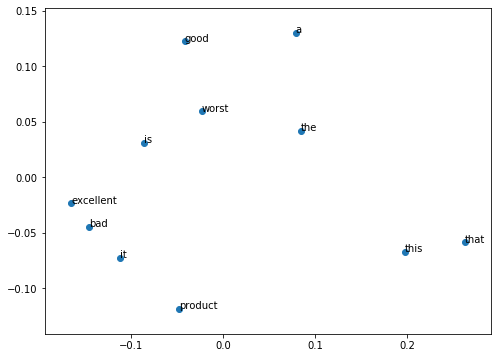

In [28]:
plot_2d_graph(vocabs, xs, ys)

In [30]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)
filename = 'data/GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [31]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [32]:
len(word_vectors_list)

11

In [33]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386159

In [34]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

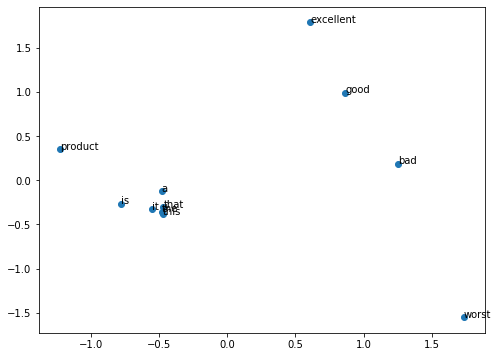

In [35]:
plot_2d_graph(vocabs, xs, ys)

### 최종 모델 저장

In [36]:
model.save('data/01_word2vec.model')

### 저장한 모델을 읽어서 사용

In [39]:
del model

In [40]:
word_vectors = model.wv

NameError: name 'model' is not defined

In [41]:
model = Word2Vec.load('data/01_word2vec.model')

In [42]:
word_vectors = model.wv

In [43]:
word_vectors